In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# first row in "Measurement"
first_row_Me = session.query(Measurement).first()
first_row_Me.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12138c780>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [11]:
# first row in "Station"
first_row_St = session.query(Station).first()
first_row_St.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12139c208>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [12]:
# Use session to get Total dates
total_date = session.query(func.count(Measurement.date)).all()
total_date

[(19550)]

In [13]:
# Measurement name & type
inspector = inspect(engine)
cols = inspector.get_columns('Measurement')
for col in cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Station name & type
cols = inspector.get_columns('Station')
for col in cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [15]:
i = [Measurement.date, Measurement.prcp]
results = session.query(*i)\
        .filter(Measurement.date.between('2016-08-23', '2017-08-23'))\
        .filter(Measurement.prcp!='None')\
        .group_by(Measurement.date).all()
for r in results:
    print(r.date, r.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 0.11
2016-09-06 0.05
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [16]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
i = [Measurement.date, Measurement.prcp]
results = session.query(*i)\
        .filter(Measurement.date.between('2016-08-23', '2017-08-23'))\
        .filter(Measurement.prcp!='None').all()


# # Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results)
df.set_index("date", inplace=True)

# Sort the dataframe by date
df = df.sort_values(by="date")

In [17]:
date = [result[0] for result in results]
precipitation = [result[1] for result in results]

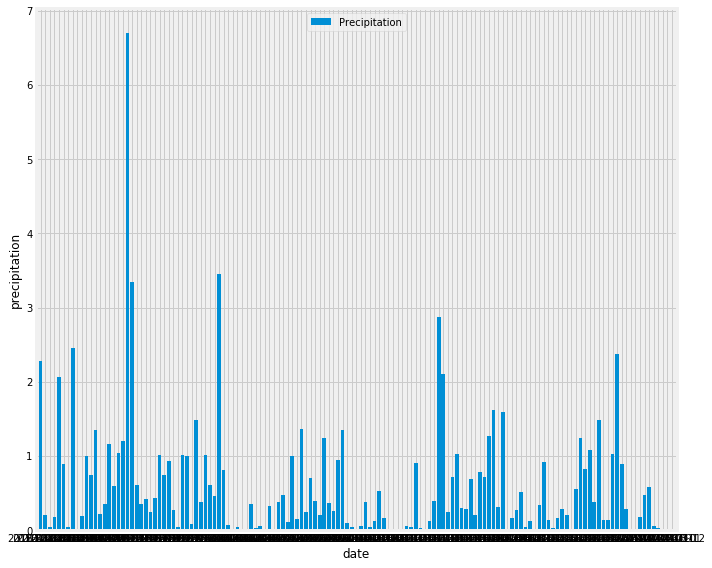

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
plt.bar(date, precipitation, label='Precipitation')
plt.xlabel("date")
plt.ylabel("precipitation")
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(100))
plt.xlim(0, 140,40 )

# ax.set_yticks(ypos)
# ax.set_yticklabels(emoji_id[::-1])
plt.legend(loc=9)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_statistics = df.describe()
prcp_statistics

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
num_station = session.query(func.count(Station.station)).all()
num_station

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.prcp).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).limit(1).all()          
most_active_station

[('USC00519281', 2772)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [24]:
hi = session.query(func.max(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).limit(1).all()     
lo = session.query(func.min(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(Measurement.tobs.desc()).limit(1).all()
avg = session.query(func.avg(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(Measurement.tobs.desc()).limit(1).all()

print(f'"Lo", "Hi", "Avg"')
print("-"*20)
print(lo, hi, avg)

"Lo", "Hi", "Avg"
--------------------
[(59.0,)] [(85.0,)] [(74.68440233236151,)]


In [25]:
tobs_results = session.query(Measurement.station, Measurement.tobs)\
                    .filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()

In [26]:
tobs_results

[('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397',

In [45]:
most_active_station_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                    filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                    filter(Measurement.station == 'USC00519281').all()

In [46]:
temp = [result[1] for result in most_active_station_tobs_results]

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

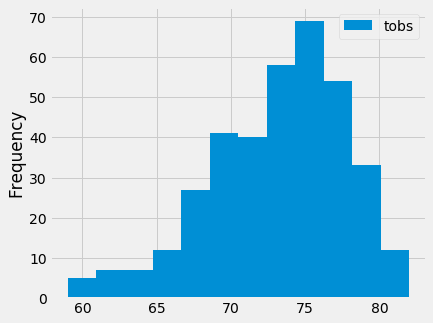

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(6,5))
plt.hist(temp, bins=12, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.tight_layout